In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Define the URL for the SEC EDGAR search page
url = "https://www.sec.gov/files/company_tickers_exchange.json"

headers = {
   "User-Agent": "your.email@email.com"
}
# Fetch the HTML content of the search page
response = requests.get(url,headers=headers)
html_content = response.content

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

json_url = f"https://data.sec.gov/api/xbrl/companyconcept/CIK0001652044/us-gaap/AccountsPayableCurrent.json"
json_response = requests.get(json_url,headers=headers)
json_content = json_response.json()
print(json_content)
print(soup.prettify())

{'cik': 1652044, 'taxonomy': 'us-gaap', 'tag': 'AccountsPayableCurrent', 'label': 'Accounts Payable, Current', 'description': "Carrying value as of the balance sheet date of liabilities incurred (and for which invoices have typically been received) and payable to vendors for goods and services received that are used in an entity's business. Used to reflect the current portion of the liabilities (due within one year or within the normal operating cycle if longer).", 'entityName': 'Alphabet Inc.', 'units': {'USD': [{'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-15-000005', 'fy': 2015, 'fp': 'Q3', 'form': '10-Q', 'filed': '2015-10-29'}, {'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-16-000012', 'fy': 2015, 'fp': 'FY', 'form': '10-K', 'filed': '2016-02-11'}, {'end': '2014-12-31', 'val': 1715000000, 'accn': '0001652044-16-000022', 'fy': 2015, 'fp': 'FY', 'form': '8-K', 'filed': '2016-05-03', 'frame': 'CY2014Q4I'}, {'end': '2015-09-30', 'val': 1549000000, 'accn': 

In [31]:


# Parse the JSON content from the BeautifulSoup object
json_data = json.loads(soup.text)

# Convert the JSON data into a pandas DataFrame
df_cik_lookup = pd.DataFrame(json_data['data'], columns=json_data['fields'])


# df_cik_lookup['cik']=df_cik_lookup['cik'].astype(str).zfill(10)
df_cik_lookup

,cik,name,ticker,exchange
0,320193,Apple Inc.,AAPL,Nasdaq
1,789019,MICROSOFT CORP,MSFT,Nasdaq
2,1045810,NVIDIA CORP,NVDA,Nasdaq
3,1652044,Alphabet Inc.,GOOGL,Nasdaq
4,1018724,AMAZON COM INC,AMZN,Nasdaq
...,...,...,...,...
10190,2023730,GigCapital7 Corp.,GIGGW,Nasdaq
10191,2024203,Cayson Acquisition Corp,CAPNU,Nasdaq
10192,2025065,Black Spade Acquisition II Co,BSIIU,Nasdaq
10193,2025341,Andretti Acquisition Corp. II,POLEU,Nasdaq


In [4]:
json_data_list = []

# Define headers for the request
headers = {
    'User-Agent': 'Your Name (your_email@example.com)',
    'Accept-Encoding': 'gzip, deflate',
    'Host': 'data.sec.gov'
}

# Loop through the first 100 CIKs
for i in range(100):
    cik = df_cik_lookup['cik'][i]
    cik=str(cik).zfill(10)
    print(cik)
    json_url = f"https://data.sec.gov/api/xbrl/companyconcept/CIK{cik}/us-gaap/AccountsPayableCurrent.json"
    json_response = requests.get(json_url, headers=headers)
    
    # Check if the request was successful
    if json_response.status_code == 200:
        json_content = json_response.json()
        json_data_list.append(json_content)
    else:
        print(f"Failed to fetch data for CIK: {cik}")

# Convert the list of JSON content into a DataFrame
df_json_content = pd.DataFrame(json_data_list)
df_json_content.to_csv('data.csv', index=False)


0000320193
0000789019
0001045810
0001652044
0001018724
0001326801
0001067983
Failed to fetch data for CIK: 0001067983
0001046179
Failed to fetch data for CIK: 0001046179
0001318605
0000059478
0001730168
0000104169
0000019617
Failed to fetch data for CIK: 0000019617
0000313838
0001403161
0000731766
Failed to fetch data for CIK: 0000731766
0000034088
Failed to fetch data for CIK: 0000034088
0000884394
Failed to fetch data for CIK: 0000884394
0000353278
Failed to fetch data for CIK: 0000353278
0001341439
0001141391
0000354950
0000080424
0000909832
0000200406
0001551152
0000937966
0000021344
Failed to fetch data for CIK: 0000021344
0000070858
Failed to fetch data for CIK: 0000070858
0001065280
0002008670
Failed to fetch data for CIK: 0002008670
0000310158
0001577552
Failed to fetch data for CIK: 0001577552
0000093410
0001000184
Failed to fetch data for CIK: 0001000184
0001108524
0000002488
0001022837
Failed to fetch data for CIK: 0001022837
0000901832
Failed to fetch data for CIK: 00009018

In [30]:
df_json_content

,cik,taxonomy,tag,label,description,entityName,units
0,320193,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Apple Inc.,"{'USD': [{'end': '2008-09-27', 'val': 55200000..."
1,789019,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,MICROSOFT CORPORATION,"{'USD': [{'end': '2009-06-30', 'val': 33240000..."
2,1045810,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,NVIDIA CORP,"{'USD': [{'end': '2009-01-25', 'val': 21886400..."
3,1652044,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Alphabet Inc.,"{'USD': [{'end': '2014-12-31', 'val': 17150000..."
4,1018724,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"AMAZON.COM, INC.","{'USD': [{'end': '2008-12-31', 'val': 35940000..."
5,1326801,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"Meta Platforms, Inc.","{'USD': [{'end': '2011-12-31', 'val': 63000000..."
6,1318605,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"Tesla, Inc.","{'USD': [{'end': '2010-12-31', 'val': 28951000..."
7,59478,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,ELI LILLY AND COMPANY,"{'USD': [{'end': '2008-12-31', 'val': 88580000..."
8,1730168,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Broadcom Inc.,"{'USD': [{'end': '2017-10-29', 'val': 11050000..."
9,104169,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,WALMART INC.,"{'USD': [{'end': '2008-07-31', 'val': 29912000..."


In [5]:
df_units=pd.json_normalize(df_json_content['units'])

In [37]:
df_units

,USD,JPY,EUR,CNY
0,"[{'end': '2008-09-27', 'val': 5520000000, 'acc...",NaN,NaN,NaN
1,"[{'end': '2009-06-30', 'val': 3324000000, 'acc...",NaN,NaN,NaN
2,"[{'end': '2009-01-25', 'val': 218864000, 'accn...",NaN,NaN,NaN
3,"[{'end': '2014-12-31', 'val': 1715000000, 'acc...",NaN,NaN,NaN
4,"[{'end': '2008-12-31', 'val': 3594000000, 'acc...",NaN,NaN,NaN
5,"[{'end': '2011-12-31', 'val': 63000000, 'accn'...",NaN,NaN,NaN
6,"[{'end': '2010-12-31', 'val': 28951000, 'accn'...",NaN,NaN,NaN
7,"[{'end': '2008-12-31', 'val': 885800000, 'accn...",NaN,NaN,NaN
8,"[{'end': '2017-10-29', 'val': 1105000000, 'acc...",NaN,NaN,NaN
9,"[{'end': '2008-07-31', 'val': 29912000000, 'ac...",NaN,NaN,NaN


In [57]:
# Define a function to extract the 'val' field from the JSON data
def extract_val(json_data):
    normalized_data = pd.json_normalize(json_data)
    filtered_data = normalized_data[normalized_data['form'] == '10-K']
    return filtered_data['val'].tolist()

def extract_filled(json_data):
    normalized_data = pd.json_normalize(json_data)
    filtered_data = normalized_data[normalized_data['form'] == '10-K']
    return filtered_data['end'].tolist()

# Apply the function to the 'USD' column and create a new column 'value'
df_json_content['value'] = df_units['USD'].apply(lambda x: extract_val(x) if isinstance(x, list) else [])
df_json_content['dates_filed'] = df_units['USD'].apply(lambda x: extract_filled(x) if isinstance(x, list) else [])

# Display the updated DataFrame
df_json_content


,cik,taxonomy,tag,label,description,entityName,units,value,dates_filed
0,320193,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Apple Inc.,"{'USD': [{'end': '2008-09-27', 'val': 55200000...","[5520000000, 5601000000, 5601000000, 120150000...","[2008-09-27, 2009-09-26, 2009-09-26, 2010-09-2..."
1,789019,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,MICROSOFT CORPORATION,"{'USD': [{'end': '2009-06-30', 'val': 33240000...","[3324000000, 4025000000, 4025000000, 419700000...","[2009-06-30, 2010-06-30, 2010-06-30, 2011-06-3..."
2,1045810,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,NVIDIA CORP,"{'USD': [{'end': '2009-01-25', 'val': 21886400...","[218864000, 344527000, 344527000, 286138000, 2...","[2009-01-25, 2010-01-31, 2010-01-31, 2011-01-3..."
3,1652044,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Alphabet Inc.,"{'USD': [{'end': '2014-12-31', 'val': 17150000...","[1715000000, 1931000000, 1931000000, 204100000...","[2014-12-31, 2015-12-31, 2015-12-31, 2016-12-3..."
4,1018724,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"AMAZON.COM, INC.","{'USD': [{'end': '2008-12-31', 'val': 35940000...","[3594000000, 5605000000, 5605000000, 805100000...","[2008-12-31, 2009-12-31, 2009-12-31, 2010-12-3..."
5,1326801,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"Meta Platforms, Inc.","{'USD': [{'end': '2011-12-31', 'val': 63000000...","[63000000, 65000000, 65000000, 87000000, 87000...","[2011-12-31, 2012-12-31, 2012-12-31, 2013-12-3..."
6,1318605,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,"Tesla, Inc.","{'USD': [{'end': '2010-12-31', 'val': 28951000...","[28951000, 56141000, 56141000, 303382000, 3033...","[2010-12-31, 2011-12-31, 2011-12-31, 2012-12-3..."
7,59478,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,ELI LILLY AND COMPANY,"{'USD': [{'end': '2008-12-31', 'val': 88580000...","[885800000, 968100000, 968100000, 1072200000, ...","[2008-12-31, 2009-12-31, 2009-12-31, 2010-12-3..."
8,1730168,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,Broadcom Inc.,"{'USD': [{'end': '2017-10-29', 'val': 11050000...","[1105000000, 811000000, 811000000, 855000000, ...","[2017-10-29, 2018-11-04, 2018-11-04, 2019-11-0..."
9,104169,us-gaap,AccountsPayableCurrent,"Accounts Payable, Current",Carrying value as of the balance sheet date of...,WALMART INC.,"{'USD': [{'end': '2008-07-31', 'val': 29912000...","[28849000000, 30451000000, 30451000000, 335570...","[2009-01-31, 2010-01-31, 2010-01-31, 2011-01-3..."


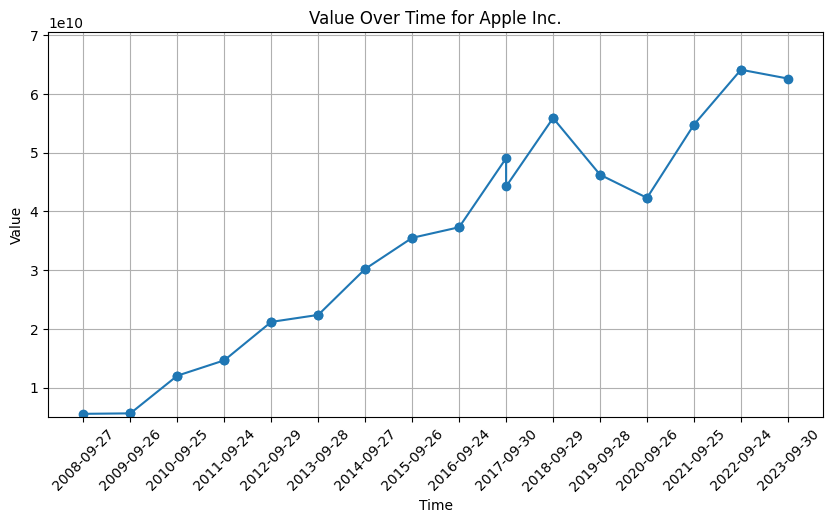

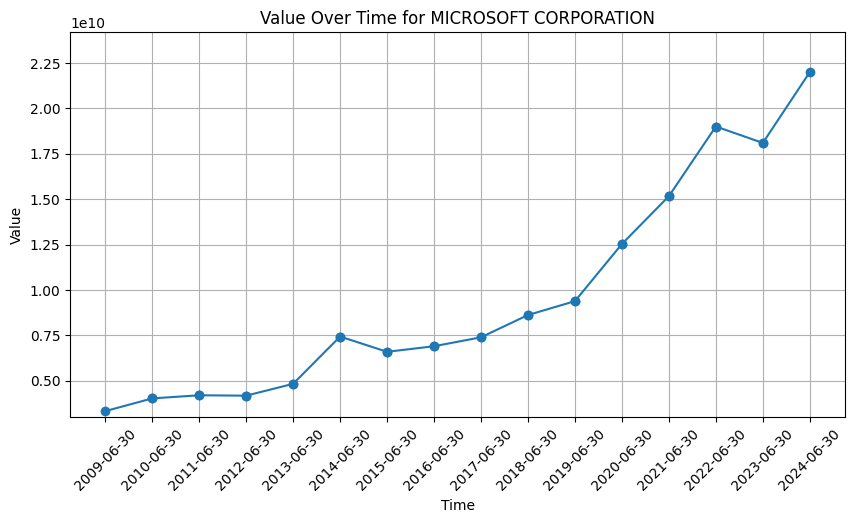

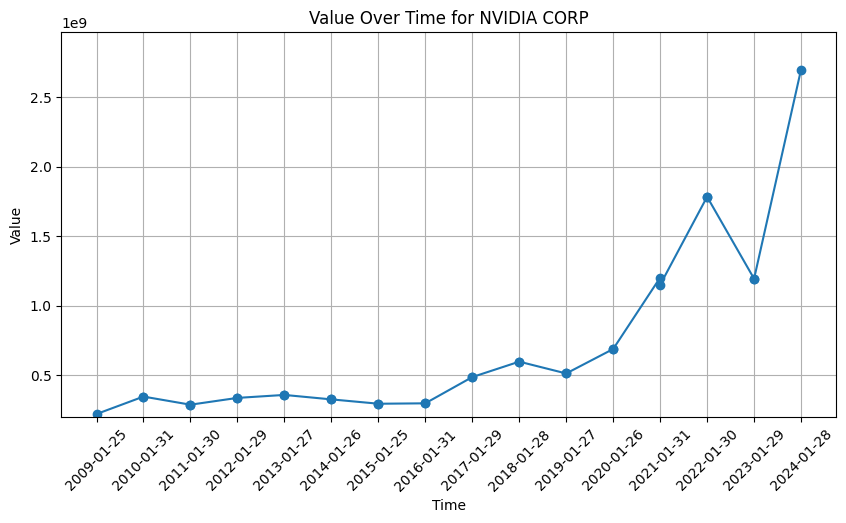

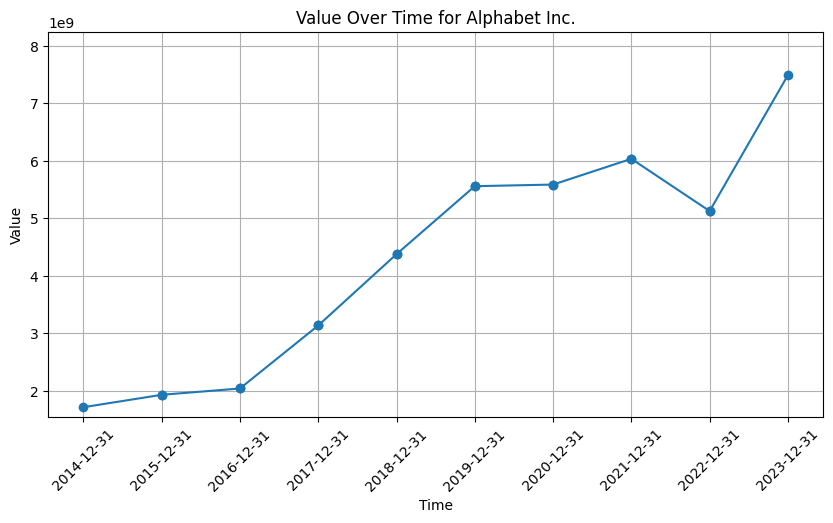

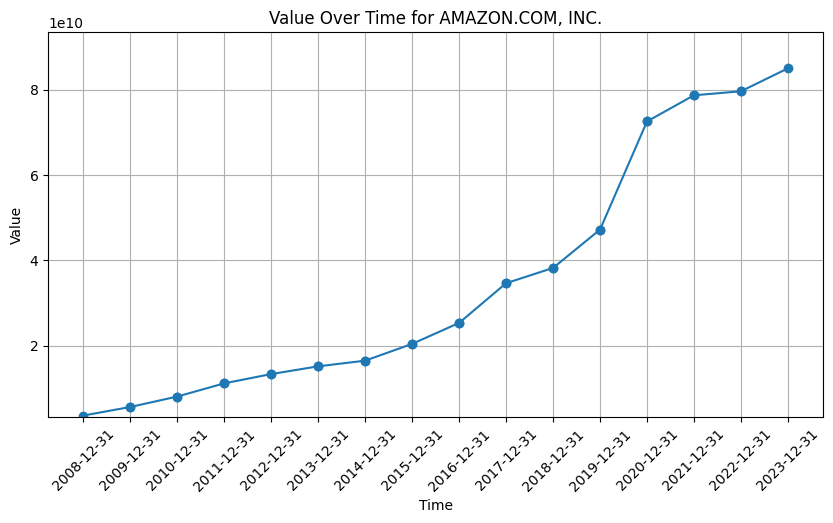

In [58]:

import matplotlib.pyplot as plt

# Plot graphs of value for the first 5 companies
for i in range(5):
    company_name = df_json_content['entityName'][i]
    values = df_json_content['value'][i]
    time = df_json_content['dates_filed'][i]
    
    plt.figure(figsize=(10, 5))
    plt.plot(time, values, marker='o')
    plt.title(f'Value Over Time for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylim(min(values) * 0.9, max(values) * 1.1)  # Set y-axis limits with some padding
    plt.grid(True)
    plt.show()

In [17]:
json_data_list = []

# Define headers for the request
headers = {
    'User-Agent': 'Your Name (your_email@example.com)',
    'Accept-Encoding': 'gzip, deflate',
    'Host': 'data.sec.gov'
}

# Loop through the first 100 CIKs
for i in range(100):
    cik = df_cik_lookup['cik'][i]
    cik=str(cik).zfill(10)
    print(cik)
    json_url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    json_response = requests.get(json_url, headers=headers)
    
    # Check if the request was successful
    if json_response.status_code == 200:
        json_content = json_response.json()
        json_data_list.append(json_content)
    else:
        print(f"Failed to fetch data for CIK: {cik}")

# Convert the list of JSON content into a DataFrame
df_json_companyfacts = pd.DataFrame(json_data_list)
df_json_companyfacts.to_csv('data2.csv', index=False)

0000320193
0000789019
0001045810
0001652044
0001018724
0001326801
0001067983
0001046179
0001730168
0000059478
0001318605
0000104169
0000019617
0000353278
0000731766
0001403161
0000884394
Failed to fetch data for CIK: 0000884394
0000034088
0001341439
0001141391
0000080424
0000909832
0000354950
0000200406
0001551152
0000937966
0000021344
0000070858
0001065280
0002008670
Failed to fetch data for CIK: 0002008670
0000310158
0001000184
0000002488
0001108524
0000093410
0001094517
0001577552
0000901832
0001283699
0001114448
0000097745
0000077476
0001707925
0000796343
0001467373
0000063908
0000858877
0000051143
0001306965
0000040545
0000313616
0000001800
0001067839
Failed to fetch data for CIK: 0001067839
0000072971
0000804328
0000097476
0000018230
0000004962
0000732712
0001413329
0001393818
0001737806
0001373715
0001061736
0000896878
0001000275
0001744489
0001035267
0000006951
0000753308
0000318154
0000895421
0001089113
0001144967
0000078003
0000217410
0000101829
0001543151
0000064040
00011666

In [18]:
df_json_companyfacts

,cik,entityName,facts
0,320193,Apple Inc.,{'dei': {'EntityCommonStockSharesOutstanding':...
1,789019,MICROSOFT CORPORATION,{'dei': {'EntityCommonStockSharesOutstanding':...
2,1045810,NVIDIA CORP,{'dei': {'EntityCommonStockSharesOutstanding':...
3,1652044,Alphabet Inc.,{'dei': {'EntityPublicFloat': {'label': 'Entit...
4,1018724,"AMAZON.COM, INC.",{'dei': {'EntityCommonStockSharesOutstanding':...
...,...,...,...
91,320187,"NIKE, Inc.",{'dei': {'EntityCommonStockSharesOutstanding':...
92,109198,"The TJX Companies, Inc.",{'dei': {'EntityCommonStockSharesOutstanding':...
93,1551182,EATON CORPORATION plc,{'dei': {'EntityCommonStockSharesOutstanding':...
94,1668717,Anheuser-Busch InBev SA/NV,{'dei': {'EntityCommonStockSharesOutstanding':...


In [19]:
df_facts=pd.json_normalize(df_json_companyfacts['facts'])

In [20]:
df_facts

,dei.EntityCommonStockSharesOutstanding.label,dei.EntityCommonStockSharesOutstanding.description,dei.EntityCommonStockSharesOutstanding.units.shares,dei.EntityPublicFloat.label,dei.EntityPublicFloat.description,dei.EntityPublicFloat.units.USD,us-gaap.AccountsPayable.label,us-gaap.AccountsPayable.description,us-gaap.AccountsPayable.units.USD,us-gaap.AccountsPayableCurrent.label,...,us-gaap.ShareBasedCompensationArrangementByShareBasedPaymentAwardOptionsExercisableWeightedAverageRemainingContractualTerm.units.decimal,us-gaap.ShareBasedCompensationArrangementByShareBasedPaymentAwardOptionsOutstandingWeightedAverageRemainingContractualTerm.units.decimal,us-gaap.ShareBasedCompensationSharesAuthorizedUnderStockOptionPlansExercisePriceRangeOutstandingOptionsWeightedAverageRemainingContractualTerm.units.decimal,us-gaap.SharesIssuedPricePerShare.units.USD/shares,us-gaap.GrantsReceivableCurrent.label,us-gaap.GrantsReceivableCurrent.description,us-gaap.GrantsReceivableCurrent.units.USD,us-gaap.GrantsReceivableNoncurrent.label,us-gaap.GrantsReceivableNoncurrent.description,us-gaap.GrantsReceivableNoncurrent.units.USD
0,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-06-27', 'val': 895816758, 'accn...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2009-03-28', 'val': 94593000000, 'ac...",Accounts Payable (Deprecated 2009-01-31),Carrying value as of the balance sheet date of...,"[{'end': '2008-09-27', 'val': 5520000000, 'acc...","Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-10-19', 'val': 8879121378, 'acc...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2009-12-31', 'val': 235244858633, 'a...",NaN,NaN,NaN,"Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-08-17', 'val': 547800000, 'accn...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2008-07-27', 'val': 6100000000, 'acc...",NaN,NaN,NaN,"Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2015-06-30', 'val': 0, 'accn': '0001...",NaN,NaN,NaN,"Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-07-17', 'val': 431807370, 'accn...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2008-06-30', 'val': 23846135567, 'ac...",Accounts Payable (Deprecated 2009-01-31),Carrying value as of the balance sheet date of...,"[{'end': '2008-12-31', 'val': 3594000000, 'acc...","Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-08-31', 'val': 391709510, 'accn...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2009-11-30', 'val': 1511237745, 'acc...",NaN,NaN,NaN,"Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2009-08-01', 'val': 423853927, 'accn...",Entity Public Float,The aggregate market value of the voting and n...,"[{'end': '2008-07-26', 'val': 13553030893, 'ac...",NaN,NaN,NaN,"Accounts Payable, Current",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,"Entity Common Stock, Shares Outstanding",Indicate number of shares or other units outst...,"[{'end': '2012-09-30', 'val': 100, 'accn': '00...",Entity Public Float,The aggregate market value

In [1]:
df_facts.columns

NameError: name 'df_facts' is not defined

In [19]:
url="https://data.sec.gov/submissions/CIK0000822663.json"
# Fetch the JSON content from the URL
response = requests.get(url,headers=headers)
json_content = response.json()

# Convert JSON content to a string
json_str = json.dumps(json_content)

# Parse the string using BeautifulSoup
soup = BeautifulSoup(json_str, 'html.parser')

# Print the parsed content
print(soup.prettify())


{"cik": "822663", "entityType": "operating", "sic": "2844", "sicDescription": "Perfumes, Cosmetics &amp; Other Toilet Preparations", "ownerOrg": "08 Industrial Applications and Services", "insiderTransactionForOwnerExists": 0, "insiderTransactionForIssuerExists": 1, "name": "INTER PARFUMS INC", "tickers": ["IPAR"], "exchanges": ["Nasdaq"], "ein": "133275609", "description": "", "website": "", "investorWebsite": "", "category": "Large accelerated filer", "fiscalYearEnd": "1231", "stateOfIncorporation": "DE", "stateOfIncorporationDescription": "DE", "addresses": {"mailing": {"street1": "551 FIFTH AVENUE", "street2": "STE 1500", "city": "NEW YORK", "stateOrCountry": "NY", "zipCode": "10176", "stateOrCountryDescription": "NY"}, "business": {"street1": "551 FIFTH AVE", "street2": "STE 1500", "city": "NEW YORK", "stateOrCountry": "NY", "zipCode": "10176", "stateOrCountryDescription": "NY"}}, "phone": "2129832640", "flags": "", "formerNames": [{"name": "JEAN PHILIPPE FRAGRANCES INC", "from": 

In [24]:
print(json_content.keys())

dict_keys(['cik', 'entityType', 'sic', 'sicDescription', 'ownerOrg', 'insiderTransactionForOwnerExists', 'insiderTransactionForIssuerExists', 'name', 'tickers', 'exchanges', 'ein', 'description', 'website', 'investorWebsite', 'category', 'fiscalYearEnd', 'stateOfIncorporation', 'stateOfIncorporationDescription', 'addresses', 'phone', 'flags', 'formerNames', 'filings'])


In [25]:
print(json_content['fiscalYearEnd'])

1231
